# Titanic Survival

### NOTES

No todas las tablas se usaran para el modelo de ML ya que algunas columnas solo contienen valores categoricos/informativos o columnas que contienen una gran cantidad de valores NULL.

Para el modelo se dropearan inicialmente las tablas de:
* PassengerId 
* Name
* Ticket
* Fare
* Cabin
* Embarked 

Y se usaran inicialmente las tablas de:
* Sex
* Age

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

sns.set_theme(style="darkgrid")
df = pd.read_csv("train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Quick Data Count

Total of passengers:  891
Total of male passengers:  577
Total of female passengers:  314


<AxesSubplot:xlabel='Sex', ylabel='count'>

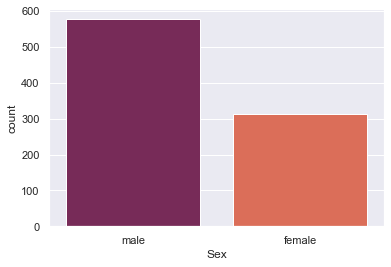

In [197]:
totalPassengers = len(df)
totalM = df['Sex'].tolist().count('male')
totalF = df['Sex'].tolist().count('female')
print("Total of passengers: ", totalPassengers)
print("Total of male passengers: ", totalM)
print("Total of female passengers: ", totalF)

sns.countplot(x='Sex', data=df, palette='rocket')


## Survivors

Total survivors:  342
Total of male survivors:  109
Total of female survivors:  233
Total of male non survivors:  468
Total of female non survivors:  81


<AxesSubplot:xlabel='Survived', ylabel='count'>

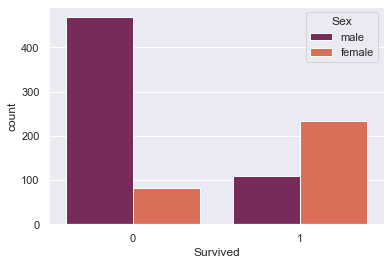

In [198]:
totalM1 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
totalF1 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
totalM0 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])
totalF0 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])
print("Total survivors: ", totalM1 + totalF1)
print("Total of male survivors: ", totalM1)
print("Total of female survivors: ", totalF1)
print("Total of male non survivors: ", totalM0)
print("Total of female non survivors: ", totalF0)

sns.countplot(x='Survived', data=df, hue='Sex', palette='rocket')

## Checking for blank values

In [199]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
maleBlanks1 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df.Age.isnull())])
femaleBlanks1 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df.Age.isnull())])
maleBlanks0 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0) & (df.Age.isnull())])
femaleBlanks0 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0) & (df.Age.isnull())])

print("Male survivors age blanks: ", maleBlanks1)
print("Female survivors age blanks: ", femaleBlanks1)
print("Male non survivors age blanks: ", maleBlanks0)
print("Female non survivors age blanks: ", femaleBlanks0)

Male survivors age blanks:  16
Female survivors age blanks:  36
Male non survivors age blanks:  108
Female non survivors age blanks:  17


In [201]:
pd.DataFrame(data = [df.isna().sum() / df.shape[0] * 100], index = ["Blanks %"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Blanks %,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


## Survivors per age

In [202]:
totalMSKid = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] <= 10)])
totalMSTeen = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 10 ) & (df['Age'] <= 20 )])
totalMSAdult = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 20)])
print("Total of kid male survivors: ", totalMSKid)
print("Total of teen male survivors: ", totalMSTeen)
print("Total of adult male survivors: ", totalMSAdult)
print(totalMSKid+totalMSTeen+totalMSAdult)
print()

totalFSKid = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] <= 10)])
totalFSTeen = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 10 ) & (df['Age'] <= 20)])
totalFSAdult = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 20)])
print("Total of kid female survivors: ", totalFSKid)
print("Total of teen female survivors: ", totalFSTeen)
print("Total of adult female survivors: ", totalFSAdult)
print(totalFSKid+totalFSTeen+totalFSAdult)

#display(df.groupby("Age")["Survived"].mean())

Total of kid male survivors:  19
Total of teen male survivors:  10
Total of adult male survivors:  64
93

Total of kid female survivors:  19
Total of teen female survivors:  34
Total of adult female survivors:  144
197


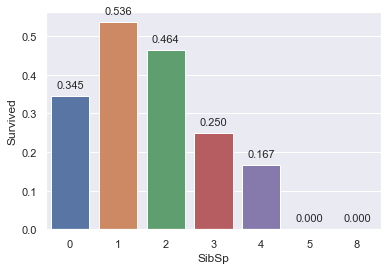

In [203]:
for i, var in enumerate(["SibSp"]):
    surv = sns.barplot(data=df, x=var, y='Survived', ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()),
            ha='center',
            size=11, 
            xytext=(0, 8), 
            textcoords='offset points')

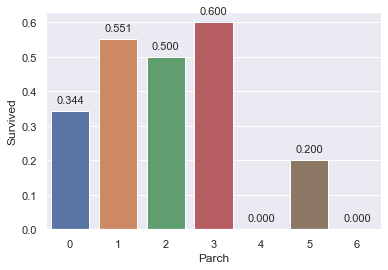

In [204]:
for i, var in enumerate(["Parch"]):
    surv = sns.barplot(data=df, x=var, y='Survived', ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()),
            ha='center',
            size=11, 
            xytext=(0, 8), 
            textcoords='offset points')

# Training Model

## Preparando datos para el entrenamiento del modelo

In [205]:
print(df.isna().sum())
df

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

X = df.drop(columns = ['PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1)
X = X.dropna().reset_index(drop = True)
y = X.Survived.values
X = X.drop(columns = 'Survived', axis = 1)

np.random.seed(20)
X_train, X_test, y_train, y_test = train_test_split(X, y)


### Cambiando variables categoricas a numericas

In [207]:
dfs_model = [X_train, X_test]
les = [dict()]*2
for i in range(2):
    les_ = dict()
    for column in dfs_model[i]:
        les_[column] = LabelEncoder()
        dfs_model[i][str(column)+'_encoded'] = les_[column].fit_transform(dfs_model[i][column].astype(str))
        dfs_model[i].drop(column, axis=1, inplace=True)
    les[i] = les_



## Entrenando el modelo

In [208]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

## Prediciones Training

In [209]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)



Confusion matrix:
 [[277  45]
 [ 64 149]]
Training AUC: 84.4888 %
Training accuracy: 79.6262 %


## Predicciones Testing

In [210]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[87 15]
 [19 58]]
Testing AUC: 83.1678 %
Testing accuracy: 81.0056 %


# Resultados

In [211]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.820755  0.852941  0.836538       102
           1   0.794521  0.753247  0.773333        77

    accuracy                       0.810056       179
   macro avg   0.807638  0.803094  0.804936       179
weighted avg   0.809470  0.810056  0.809350       179

